In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [ ]:
ROOT = "data"
CLASS_NAME = sorted([os.path.basename(path) for path in glob.glob("data/train/*")])

In [26]:
def read_image(path, size):
    return np.array(Image.open(path).convert("RGB").resize(size))

In [27]:
def folder_to_images(folder, size):
    list_dir = [folder + "/" + name for name in os.listdir(folder)]
    img_np = np.zeros(shape=(len(list_dir), *size, 3))
    img_path = []
    for i, path in enumerate(list_dir):
        img_np[i] = read_image(path, size)
        img_path.append(path)
    img_path = np.array(img_path)
    return img_np, img_path

In [60]:
def absolute_diff(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(query - data), axis=axis_batch_size)


def get_l1_score(root_img_path, query_path, size):
    query = read_image(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + "/" + folder
            img_np, img_path = folder_to_images(path, size)
            rates = absolute_diff(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

def show_images(query, ls_path_score, size):
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    for ax in axes:
        ax.axis('off')
    path = ls_path_score[0][0]
    axes[0].imshow(query)
    axes[0].set_title((os.path.basename(os.path.dirname(path))))
    for i, (path, score) in enumerate(ls_path_score[:5]):
        img = read_image(path, size)
        axes[i+1].imshow(img)
        axes[i+1].set_title(f"{(os.path.basename(os.path.dirname(path)))}: {score:.2f}")
    plt.show()

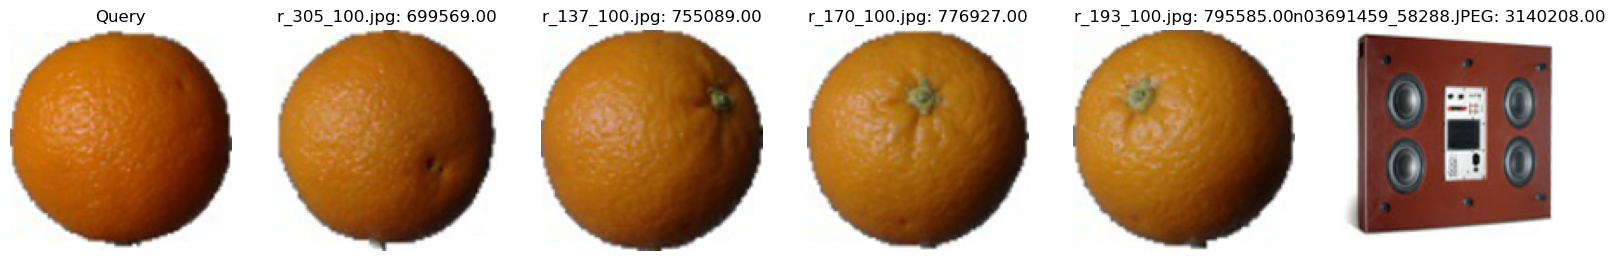

In [51]:
root_img_path = "data/train"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (128, 128)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
ls_path_score.sort(key=lambda x: x[1])
show_images(query, ls_path_score, size)

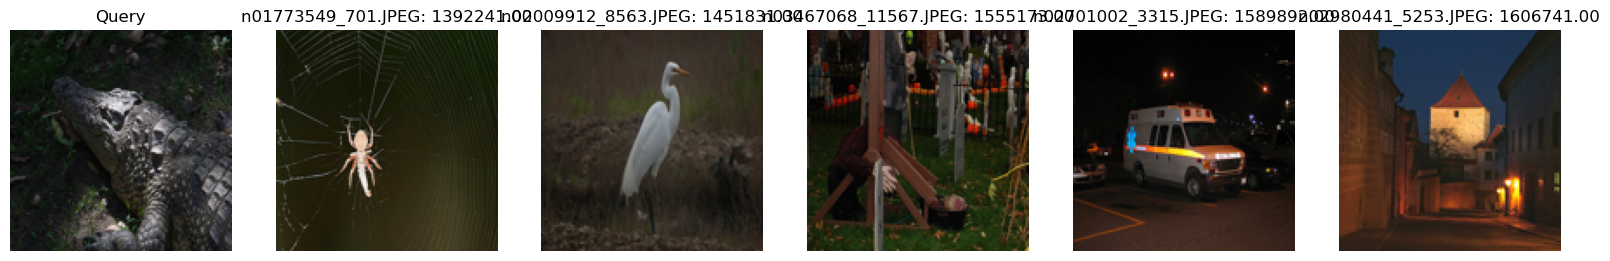

In [52]:
query_path = "data/test/African_crocodile/n01697457_18534.JPEG"
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
ls_path_score.sort(key=lambda x: x[1])
show_images(query, ls_path_score, size)

In [45]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.mean((query - data) ** 2, axis=axis_batch_size)

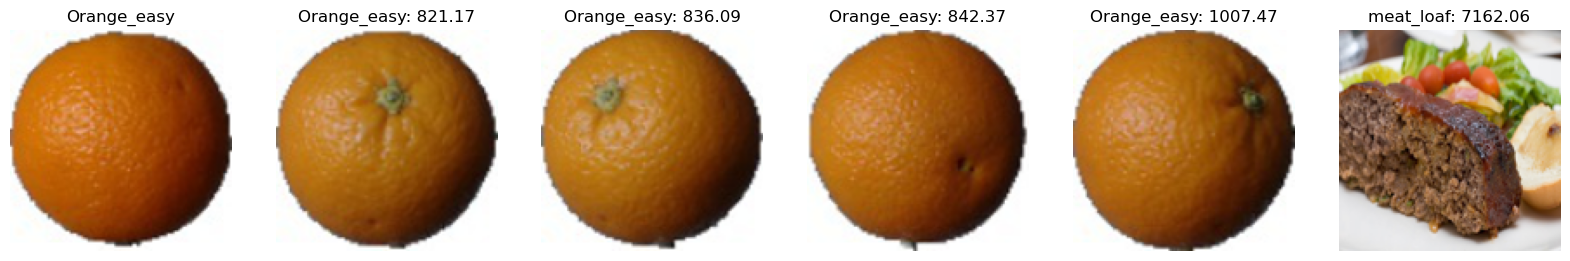

In [61]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + "/" + folder
            img_np, img_path = folder_to_images(path, size)
            rates = mean_square_difference(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

root_img_path = "data/train"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (128, 128)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
ls_path_score.sort(key=lambda x: x[1])
show_images(query, ls_path_score, size)

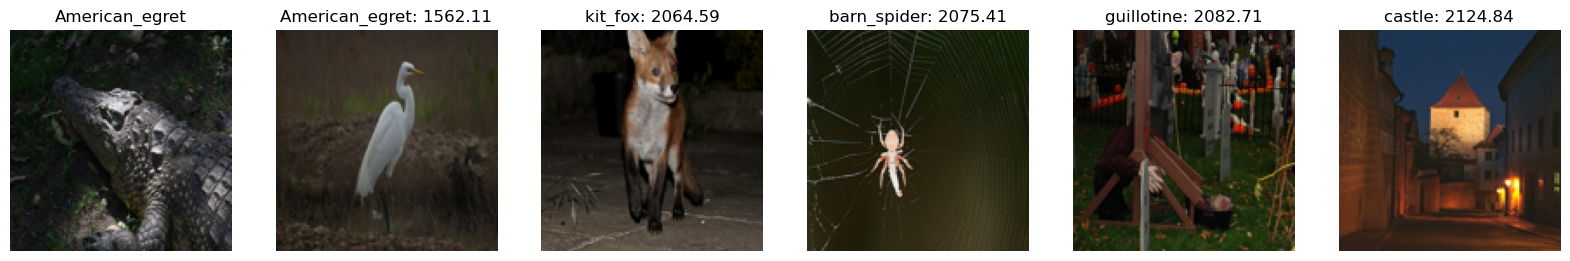

In [62]:
query_path = "data/test/African_crocodile/n01697457_18534.JPEG"
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
ls_path_score.sort(key=lambda x: x[1])
show_images(query, ls_path_score, size)

In [67]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    num = np.dot(query, data)
    denum = np.linalg.norm(query, axis=axis_batch_size) * np.linalg.norm(data, axis=axis_batch_size)
    return num / denum

def get_cosine_score(root_img_path, query_path, size):
    query = read_image(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + "/" + folder
            img_np, img_path = folder_to_images(path, size)
            rates = cosine_similarity(query, img_np)
            ls_path_score.extend(list(zip(img_path, rates)))
    return query, ls_path_score

In [66]:
root_img_path = "data/train"
query_path = "data/test/Orange_easy/0_100.jpg"
size = (128, 128)
query, ls_path_score = get_cosine_score(root_img_path, query_path, size)
ls_path_score.sort(key=lambda x: x[1], reverse=True)

ValueError: Improper number of dimensions to norm.